# shaddi.com EDA

## Import necessary libraries

In [35]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns

## Reading datasets

In [36]:
# Column names
sales_columns = ["date", "convenience_store", "store", "county_number", "county", "category", "category_name", "vendor_no", "vendor", "item", "description", "pack", "liter_size", "state_btl_cost", "btl_price", "bottle_qty", "total"]
products_columns = ["item_no", "category_name", "item_description", "vendor", "vendor_name", "bottle_size", "pack", "inner_pack", "age", "proof", "list_date", "upc", "scc", "bottle_price", "shelf_price", "case_cost"]
stores_columns = ["store","store_name","store_status","store_address","address_info"]
counties_columns = ["county","population"]


# Loading data into dataframes
sales_df = pd.read_csv('salesV1.csv',sep='|', header = None)
products_df = pd.read_csv('productsV1.csv',sep=',', header = None)
stores_df = pd.read_csv('storesV1.csv',sep='|', header = None)
counties_df = pd.read_csv('counties.csv',sep=',', header = None)

sales_df.columns = sales_columns
products_df.columns = products_columns
stores_df.columns = stores_columns
counties_df.columns = counties_columns



print("Data load successfull !")
print("Sales data shape :", sales_df.shape)
print("Products data shape :", products_df.shape)
print("Stores data shape :", stores_df.shape)
print("Counties data shape :", counties_df.shape)

c:\users\91991\appdata\local\programs\python\python39\lib\site-packages\IPython\core\interactiveshell.py:3169: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Data load successfull !
Sales data shape : (3049913, 17)
Products data shape : (9977, 16)
Stores data shape : (1973, 5)
Counties data shape : (99, 2)


## Getting glimpse of data

In [37]:
sales_df.head()

,date,convenience_store,store,county_number,county,category,category_name,vendor_no,vendor,item,description,pack,liter_size,state_btl_cost,btl_price,bottle_qty,total
0,2014-11-13 00:00:00,NaN,2635,82,Scott,1032200.0,IMPORTED VODKA - MISC,370,Pernod Ricard USA/Austin Nichols,34036,Absolut Pears,12,750,11.49,17.24,4,68.96
1,2014-11-13 00:00:00,NaN,2635,82,Scott,1032200.0,IMPORTED VODKA - MISC,370,Pernod Ricard USA/Austin Nichols,34076,Absolut Vanilia,12,750,11.49,17.24,12,206.88
2,2014-11-13 00:00:00,NaN,2635,82,Scott,1032200.0,IMPORTED VODKA - MISC,370,Pernod Ricard USA/Austin Nichols,34116,Absolut Mandrin,12,750,11.49,17.24,12,206.88
3,2014-11-13 00:00:00,NaN,2635,82,Scott,1032080.0,IMPORTED VODKA,420,Moet Hennessy USA Inc.,34155,Belvedere Vodka,6,750,17.15,25.73,6,154.38
4,2014-11-13 00:00:00,NaN,2635,82,Scott,1032080.0,IMPORTED VODKA,260,Diageo Americas,34164,Ciroc Luxury Vodka,24,200,5.00,7.50,6,45.00


In [38]:
products_df.head()

,item_no,category_name,item_description,vendor,vendor_name,bottle_size,pack,inner_pack,age,proof,list_date,upc,scc,bottle_price,shelf_price,case_cost
0,904616,MISC. AMERICAN CORDIALS & LIQUEURS,Travis Hasse Apple Pie,305,Mhw Ltd,750,12,1,NaN,40,2009-02-11 00:00:00,NaN,NaN,9.77,14.66,117.22
1,904617,MISC. IMPORTED CORDIALS & LIQUEURS,D'aristi Xtabentun,391,Anchor Distilling (preiss Imports),750,12,1,NaN,60,2009-04-24 00:00:00,NaN,NaN,14.12,21.18,169.40
2,904618,PEACH BRANDIES,Hiram Walker Peach Brandy,370,Pernod Ricard Usa/austin Nichols,1000,12,1,NaN,60,2009-12-16 00:00:00,NaN,8.954050e+10,6.50,9.74,77.94
3,904619,SCOTCH WHISKIES,Oak Cross Whisky,305,Mhw Ltd,750,6,1,NaN,86,2009-12-24 00:00:00,NaN,NaN,25.33,38.00,152.00
4,904620,FLAVORED VODKA,Uv Red(cherry) Vodka,380,Phillips Beverage Company,200,24,1,NaN,60,2009-11-05 00:00:00,NaN,1.008710e+13,1.97,2.96,47.30


In [39]:
stores_df.head()

,store,store_name,store_status,store_address,address_info
0,2106,Hillstreet News and Tobacco,A,"2217 CollegeCedar Falls, IA 506130000(42.51716...",NaN
1,2112,Mike's Liquors,I,"407 Sharp St.Glenwood, IA 515340000(41.0463126...",NaN
2,2113,Jamboree Foods,A,"1119 Market St. Box 71Gowrie, IA 505430000(42....",NaN
3,2119,Manly Liquor Store,I,"133 East MainManly, IA 504560000(43.2868631320...",NaN
4,2130,Sycamore Convenience,A,"617 SycamoreWaterloo, IA 507030000(42.49783399...",NaN


In [40]:
counties_df.head()

,county,population
0,Adair,7682
1,Adams,4029
2,Allamakee,14330
3,Appanoose,12884
4,Audubon,6119


## Merging datasets

### Merging sales and stores data

In [41]:
# Key used "store"
sales_store_df = pd.merge(sales_df,stores_df, how = 'left', left_on = 'store', right_on = 'store')
sales_store_df.head()

,date,convenience_store,store,county_number,county,category,category_name,vendor_no,vendor,item,...,pack,liter_size,state_btl_cost,btl_price,bottle_qty,total,store_name,store_status,store_address,address_info
0,2014-11-13 00:00:00,NaN,2635,82,Scott,1032200.0,IMPORTED VODKA - MISC,370,Pernod Ricard USA/Austin Nichols,34036,...,12,750,11.49,17.24,4,68.96,Hy-vee #4 / Davenport,A,"4064 E 53rd StDavenport, IA 528070000(41.57496...",NaN
1,2014-11-13 00:00:00,NaN,2635,82,Scott,1032200.0,IMPORTED VODKA - MISC,370,Pernod Ricard USA/Austin Nichols,34076,...,12,750,11.49,17.24,12,206.88,Hy-vee #4 / Davenport,A,"4064 E 53rd StDavenport, IA 528070000(41.57496...",NaN
2,2014-11-13 00:00:00,NaN,2635,82,Scott,1032200.0,IMPORTED VODKA - MISC,370,Pernod Ricard USA/Austin Nichols,34116,...,12,750,11.49,17.24,12,206.88,Hy-vee #4 / Davenport,A,"4064 E 53rd StDavenport, IA 528070000(41.57496...",NaN
3,2014-11-13 00:00:00,NaN,2635,82,Scott,1032080.0,IMPORTED VODKA,420,Moet Hennessy USA Inc.,34155,...,6,750,17.15,25.73,6,154.38,Hy-vee #4 / Davenport,A,"4064 E 53rd StDavenport, IA 528070000(41.57496...",NaN
4,2014-11-13 00:00:00,NaN,2635,82,Scott,1032080.0,IMPORTED VODKA,260,Diageo Americas,34164,...,24,200,5.00,7.50,6,45.00,Hy-vee #4 / Davenport,A,"4064 E 53rd StDavenport, IA 528070000(41.57496...",NaN


### Merging Sales and stores data with products data

In [53]:
# Key used "Item no"
sales_store_prd_df = pd.merge(sales_store_df,products_df, how = 'left', left_on = 'item',suffixes=('_sales', '_products'), right_on = 'item_no')
sales_store_prd_df.head()

,date,convenience_store,store,county_number,county,category,category_name_sales,vendor_no,vendor_sales,item,...,pack_products,inner_pack,age,proof,list_date,upc,scc,bottle_price,shelf_price,case_cost
0,2014-11-13 00:00:00,NaN,2635,82,Scott,1032200.0,IMPORTED VODKA - MISC,370,Pernod Ricard USA/Austin Nichols,34036,...,12.0,1.0,NaN,80.0,2007-02-01 00:00:00,8.352290e+11,2.083520e+13,11.49,17.24,137.88
1,2014-11-13 00:00:00,NaN,2635,82,Scott,1032200.0,IMPORTED VODKA - MISC,370,Pernod Ricard USA/Austin Nichols,34076,...,12.0,1.0,NaN,80.0,2003-03-01 00:00:00,8.352290e+11,2.083520e+13,11.49,17.24,137.88
2,2014-11-13 00:00:00,NaN,2635,82,Scott,1032200.0,IMPORTED VODKA - MISC,370,Pernod Ricard USA/Austin Nichols,34116,...,12.0,1.0,NaN,80.0,1999-07-01 00:00:00,8.352290e+11,1.008700e+13,11.49,17.24,137.88
3,2014-11-13 00:00:00,NaN,2635,82,Scott,1032080.0,IMPORTED VODKA,420,Moet Hennessy USA Inc.,34155,...,6.0,1.0,NaN,80.0,2005-11-01 00:00:00,8.711607e+10,1.008710e+13,17.15,25.73,102.90
4,2014-11-13 00:00:00,NaN,2635,82,Scott,1032080.0,IMPORTED VODKA,260,Diageo Americas,34164,...,24.0,1.0,NaN,80.0,2012-04-01 00:00:00,8.807617e+10,1.008810e+13,5.00,7.50,119.84


In [54]:
print("Total rows in merged data set :", sales_store_prd_df.shape[0])

Total rows in merged data set : 3049913


## Checking for null values in merged dataset

#### Creating a copy of merged data set

In [59]:
mergedSales_df = sales_store_prd_df.copy()

In [61]:
print("Null count check")
null_df = mergedSales_df.isnull().sum().to_frame(name = 'Null count')
null_df['Null percentage(%)'] = null_df['Null count'] / mergedSales_df.shape[0] * 100
null_df[null_df['Null count'] > 0]

Null count check


,Null count,Null percentage(%)
convenience_store,2732343,89.587572
county,1719,0.056362
category,29,0.000951
category_name_sales,383,0.012558
vendor_sales,62,0.002033
store_name,6459,0.211777
store_status,6459,0.211777
store_address,6459,0.211777
address_info,3033979,99.477559
item_no,1120,0.036722


### Dropping unnecessary columns

In [62]:
# Dropping unnecessary columns
# Where null percentage is greater then 50%
# Duplicates columns from other datasets
mergedSales_df.drop(['convenience_store','address_info','age','category_name_products','vendor_products','pack_products'], axis=1, inplace=True)
print("removed unnecessary columns!")

removed unnecessary columns!


### Dropping all null records

In [69]:
mergedSales_df = mergedSales_df.dropna()
print("Total rows in after removing :", mergedSales_df.shape[0])
print("{}% records have been removed ! ".format(100 - (mergedSales_df.shape[0]/sales_store_prd_df.shape[0]*100)))

Total rows in after removing : 3017423
1.065276288208878% records have been removed ! 


### Verifying operations

In [70]:
print("Null count check")
null_df = mergedSales_df.isnull().sum().to_frame(name = 'Null count')
null_df['Null percentage(%)'] = null_df['Null count'] / mergedSales_df.shape[0] * 100
null_df[null_df['Null count'] > 0]

Null count check


,Null count,Null percentage(%)


In [75]:
mergedSales_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3017423 entries, 0 to 3049912
Data columns (total 31 columns):
 #   Column               Dtype  
---  ------               -----  
 0   date                 object 
 1   store                int64  
 2   county_number        int64  
 3   county               object 
 4   category             float64
 5   category_name_sales  object 
 6   vendor_no            int64  
 7   vendor_sales         object 
 8   item                 int64  
 9   description          object 
 10  pack_sales           int64  
 11  liter_size           int64  
 12  state_btl_cost       float64
 13  btl_price            float64
 14  bottle_qty           int64  
 15  total                float64
 16  store_name           object 
 17  store_status         object 
 18  store_address        object 
 19  item_no              float64
 20  item_description     object 
 21  vendor_name          object 
 22  bottle_size          float64
 23  inner_pack           float64
 24

## Describing dataset

In [76]:
mergedSales_df.describe(include='object')

,date,county,category_name_sales,vendor_sales,description,store_name,store_status,store_address,item_description,vendor_name,list_date
count,3017423,3017423,3017423,3017423,3017423,3017423,3017423,3017423,3017423,3017423,3017423
unique,237,99,67,158,2192,1305,1,1316,2111,120,567
top,2014-01-06 00:00:00,Polk,80 PROOF VODKA,Diageo Americas,Black Velvet,Hy-vee #3 / Bdi / Des Moines,A,"3221 Se 14th StDes Moines, IA 503200000(41.554...",Black Velvet,Diageo Americas,1977-05-01 00:00:00
freq,26014,554452,412665,498186,80923,29012,3017423,29012,80923,498592,88819


### Key insights

- Most sales occcured on 06 January 2014 with total count of 26014.
- Most sales occured in 'Polk' county with total count of 554452.
- Most sales are by 'Diageo Americas' with total sale count of 498186
- Most sales happened on 'Black Velvet' with total sale count of 80923

In [78]:
mergedSales_df.columns.values

array(['date', 'store', 'county_number', 'county', 'category',
       'category_name_sales', 'vendor_no', 'vendor_sales', 'item',
       'description', 'pack_sales', 'liter_size', 'state_btl_cost',
       'btl_price', 'bottle_qty', 'total', 'store_name', 'store_status',
       'store_address', 'item_no', 'item_description', 'vendor_name',
       'bottle_size', 'inner_pack', 'proof', 'list_date', 'upc', 'scc',
       'bottle_price', 'shelf_price', 'case_cost'], dtype=object)

## The top 5s

In [102]:
# Top 5 counties with max sales
county_sales = mergedSales_df['county'].value_counts().to_frame('total_sales')
county_sales.index.name = 'county'
county_sales = county_sales.reset_index()
county_sales.head()

,county,total_sales
0,Polk,554452
1,Linn,248105
2,Scott,186205
3,Black Hawk,162458
4,Johnson,154697


In [109]:
# Top 5 categories with max sales
catg_sales = mergedSales_df['category_name_sales'].value_counts().to_frame('total_sales')
catg_sales.index.name = 'category_name'
catg_sales = catg_sales.reset_index()
catg_sales.head()


,category_name,total_sales
0,80 PROOF VODKA,412665
1,CANADIAN WHISKIES,287122
2,STRAIGHT BOURBON WHISKIES,169680
3,SPICED RUM,164109
4,BLENDED WHISKIES,141669


In [107]:
# Top 5 vendors with max sales
ven_sales = mergedSales_df['vendor_sales'].value_counts().to_frame('total_sales')
ven_sales.index.name = 'vendor'
ven_sales = ven_sales.reset_index()
ven_sales.head()

,vendor,total_sales
0,Diageo Americas,498186
1,Jim Beam Brands,298273
2,Luxco-St Louis,278380
3,Pernod Ricard USA/Austin Nichols,191604
4,Constellation Wine Company Inc.,151749


In [108]:
# Top 5 days with max sales
date_sales = mergedSales_df['date'].value_counts().to_frame('total_sales')
date_sales.index.name = 'date'
date_sales = date_sales.reset_index()
date_sales.head()

,date,total_sales
0,2014-01-06 00:00:00,26014
1,2014-05-28 00:00:00,24612
2,2014-05-21 00:00:00,24414
3,2014-04-09 00:00:00,23970
4,2014-04-30 00:00:00,23766


In [110]:
# Top 5 product with max sales
prd_sales = mergedSales_df['description'].value_counts().to_frame('Total sales')
prd_sales.index.name = 'item_description'
prd_sales = prd_sales.reset_index()
prd_sales.head()

,item_description,Total sales
0,Black Velvet,80923
1,Hawkeye Vodka,74136
2,Seagrams 7 Crown Bl Whiskey,39471
3,Captain Morgan Spiced Rum,37354
4,Five O'clock,36871


### Getting Month, day and year

In [131]:
mergedSales_df['year'] = mergedSales_df['date'].apply(lambda x : x[:4])
mergedSales_df['month'] = mergedSales_df['date'].apply(lambda x : x[5:7])
mergedSales_df['day'] = mergedSales_df['date'].apply(lambda x : x[8:10])
mergedSales_df['day_of_week'] = pd.to_datetime(mergedSales_df['date']).dt.dayofweek + 1

### Calculating total sales per year

In [132]:
year_sales = mergedSales_df['year'].value_counts().to_frame(name = 'total_sales')
year_sales.index.name = 'year'
year_sales = year_sales.reset_index()
year_sales

,year,total_sales
0,2014,2709195
1,2015,308228


#### Insights
- Maximum sales happened in year 2014 with total sales of 2709195 followed by 2014 with 308228 sales

### Calculating total sales per month for year 2014

In [133]:
year14_sales = mergedSales_df[mergedSales_df['year'] == '2014']['month'].value_counts().to_frame(name = 'total_sales')
year14_sales.index.name = 'month'
year14_sales = year14_sales.reset_index()
year14_sales

,month,total_sales
0,04,348878
1,05,325564
2,03,316738
3,01,312330
4,02,295588
5,07,184220
6,06,182753
7,10,179582
8,08,171448
9,09,170091


#### Insights
- Maximum sales happened in April(04) in year 2014 with total sales of 348878 followed by May(05) with 325564 sales

### Calculating total sales per month for year 2015

In [134]:
year15_sales = mergedSales_df[mergedSales_df['year'] == '2015']['month'].value_counts().to_frame(name = 'total_sales')
year15_sales.index.name = 'month'
year15_sales = year15_sales.reset_index()
year15_sales

,month,total_sales
0,01,155340
1,02,152888


#### Insights (As we have data of only two months below results may not be true for year 2015)
- Maximum sales happened in January(04) in year 2015 with total sales of 155340 followed by Feb(02) with 152888 sales

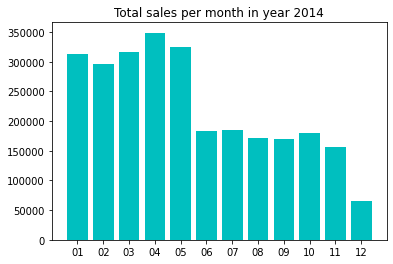

In [135]:
year14_sales = year14_sales.sort_values(by='month')
plt.bar(year14_sales['month'],  year14_sales['total_sales'],color='c')
plt.title('Total sales per month in year 2014')
plt.show()

### Calculating total sales per week of day for year 2014

In [137]:
dayOfWeek_count = mergedSales_df[mergedSales_df['year'] == '2014'].groupby(['day_of_week'],as_index=False).size()
dayOfWeek_count = dayOfWeek_count.rename(columns={"size":"Total sales"})
dayOfWeek_count

,day_of_week,Total sales
0,1,729525
1,2,593458
2,3,797046
3,4,533548
4,5,47918
5,6,7700


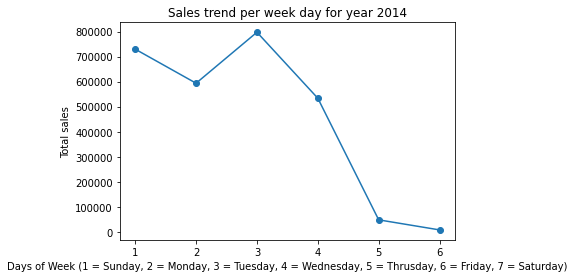

In [139]:
plt.plot(dayOfWeek_count['day_of_week'],dayOfWeek_count['Total sales'], marker='o')
plt.xlabel('Days of Week (1 = Sunday, 2 = Monday, 3 = Tuesday, 4 = Wednesday, 5 = Thrusday, 6 = Friday, 7 = Saturday)')
# naming the y axis
plt.ylabel('Total sales')
# giving a title to my graph
plt.title('Sales trend per week day for year 2014')
plt.show()

#### Insight
- No sales data for saturdays looks like data is incomplete
- Maximum sales are on tuesdays followed by sundays

In [140]:
mergedSales_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3017423 entries, 0 to 3049912
Data columns (total 35 columns):
 #   Column               Dtype  
---  ------               -----  
 0   date                 object 
 1   store                int64  
 2   county_number        int64  
 3   county               object 
 4   category             float64
 5   category_name_sales  object 
 6   vendor_no            int64  
 7   vendor_sales         object 
 8   item                 int64  
 9   description          object 
 10  pack_sales           int64  
 11  liter_size           int64  
 12  state_btl_cost       float64
 13  btl_price            float64
 14  bottle_qty           int64  
 15  total                float64
 16  store_name           object 
 17  store_status         object 
 18  store_address        object 
 19  item_no              float64
 20  item_description     object 
 21  vendor_name          object 
 22  bottle_size          float64
 23  inner_pack           float64
 24

In [150]:
pack_sales = mergedSales_df['pack_sales'].value_counts().to_frame(name = 'total_sales')
pack_sales.index.name = 'pack'
pack_sales = pack_sales.reset_index()

pack_sales = pack_sales.sort_values(by='total_sales', ascending=False)
pack_sales

,pack,total_sales
0,12,1832930
1,6,802048
2,24,254786
3,48,63416
4,10,42202
5,1,10633
6,4,3043
7,5,2987
8,8,2324
9,3,1179


#### Insight
- Maximum sales with pack of 12 followed by pack of 6

In [152]:
liter_sales = mergedSales_df['liter_size'].value_counts().to_frame(name = 'total_sales')
liter_sales.index.name = 'liter_size'
liter_sales = liter_sales.reset_index()
liter_sales = liter_sales.sort_values(by='total_sales', ascending=False)
liter_sales

,liter_size,total_sales
0,750,1380148
1,1750,622636
2,1000,438092
3,375,283449
4,500,121069
5,200,99359
6,600,33978
7,300,12380
8,3000,10422
9,100,6054


#### Insight
- Maximum sales of 750 ml products followed by 1750 ml products

#### Average State bottle price per category

In [159]:
avgBottlePrice = mergedSales_df.groupby(['category_name_sales'])['category_name_sales','state_btl_cost'].mean()
avgBottlePrice.index.name = 'category_name'
avgBottlePrice = avgBottlePrice.reset_index()
avgBottlePrice = avgBottlePrice.sort_values(by='state_btl_cost', ascending=False)
avgBottlePrice

<ipython-input-159-fa44a47db3e6>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  avgBottlePrice = mergedSales_df.groupby(['category_name_sales'])['category_name_sales','state_btl_cost'].mean()


,category_name,state_btl_cost
53,SINGLE MALT SCOTCH,28.701215
52,SINGLE BARREL BOURBON WHISKIES,22.118897
57,STRAIGHT RYE WHISKIES,17.479350
36,IRISH WHISKIES,16.596334
23,DECANTERS & SPECIALTY PACKAGES,15.856939
...,...,...
29,GREEN CREME DE MENTHE,4.630590
8,ANISETTE,4.629783
7,AMERICAN SLOE GINS,4.577621
3,AMERICAN AMARETTO,4.497932


#### Insight
- Average State bottle cost is maximum for SINGLE MALT SCOTCHES.